# PARTE A
cercare le onde stazionarie di una corda di lunghezza fissa (L = 1m), in seguito ripetere variando la tensione

In [1]:
import numpy as np
import pandas as pd
from typing import Final
import os

dir_path = os.path.abspath('')
FILE = dir_path + '/../CSV/' + 'misurazione1_2.csv' # la prima misurazione il peso toccava il banco

AMPIEZZA : Final = 5 # Volt ampiezza dell'oscillazione
L: Final = 1 # m

fr = pd.read_csv(FILE, sep = ';')  # fileread

masse = np.array(fr['massa']) * 0.001 #Kg
f1 = np.array(fr['f1']) #Hz float per evitare errori nella stima della covarianza di curve_fit
f2 = np.array(fr['f2'])
f3 = np.array(fr['f3'])
f4 = np.array(fr['f4'])

n_armonica = np.array([1,2,3,4]) # armoniche instaurate
ERRORE_SENSIBILITA_OSCILLOSCOPIO: Final = 1.0 # Hz


### verifica $\nu \propto N_{nodi}$

B: 18.0, sigmaB: 0.0, chi: 0.0
B: 23.433333333332097, sigmaB: 0.19340994598154057, chi: 0.0279
B: 27.20000000040905, sigmaB: 0.1763834202742058, chi: 0.0086
B: 34.06666666874485, sigmaB: 0.1784708710026156, chi: 0.0128


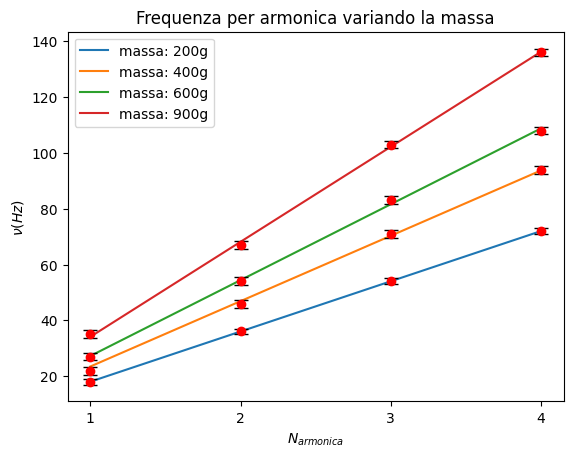

In [2]:
from interpolazione3 import RettaInterpolataB
import matplotlib.pyplot as plt

for i in range(0,len(masse)):
    f = np.array([f1[i],f2[i],f3[i],f4[i]])
    r = RettaInterpolataB(n_armonica,f,ERRORE_SENSIBILITA_OSCILLOSCOPIO)
    print(f'B: {r.B}, sigmaB: {r.sigmaB}, chi: {r.rchisquare}')
    plt.plot(r.x_best,r.y_best,label=f"massa: {int(masse[i]*1000)}g")
    plt.errorbar(n_armonica,f,yerr=r.sigmaY,fmt='o', ecolor='black', color="red", capsize=5)

plt.title("Frequenza per armonica variando la massa")
plt.xlabel("$N_{armonica}$")
plt.ylabel(f"${chr(92)}nu (Hz)$")
plt.xticks(n_armonica)
plt.legend()
plt.show()

### Confronto con valore di frequenza atteso:

$\nu_n = \frac{n}{2L}\sqrt{\frac{\tau}{\mu}}$

- n: numero di armonica
- $\nu$: frequenza
- $L$: lunghezza della corda
- $\tau$: tensione ($mg$)
- $\mu$: densità lineare della corda

l'esperimento precendente viene ripetuto, grazie alla misura della densità lineare, della lunghezza della corda e della tensione si può ricavare la frequenza teorica delle armoniche che si instaurano.
Qui sotto vengono confrontati i valori teorici con i dati raccolti

Nota: per questo punto è stata cambiata la corda e son state prese nuove misure

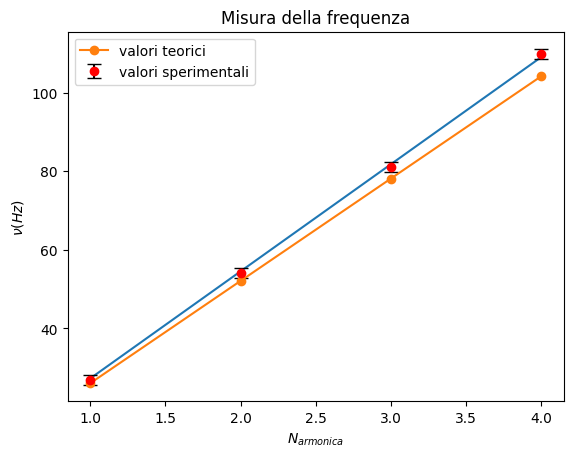

f_interpolazione:  [ 27.  55.  82. 109.]
f_teoriche:  [ 26.  52.  78. 104.]
distanza in sigma:  [0.7 2.3 3.  3.8]


In [3]:
n = 2
L = 0.82 # m
tau = 0.4 * 9.81 #N
m = 4.3 * 0.001 #Kg
l_corda = 2.0 #m
mu = m / l_corda

# NUOVE MISURE con corda differente con i valori di lunghezza e massa sopra indicati
f_misurate = np.array([27, 54, 81, 110])

def nu(n):
    return (n/(2*L))*np.sqrt(tau/mu)

r = RettaInterpolataB(n_armonica,f_misurate,1)
f_teoriche = nu(n_armonica)
f_interpolate = np.round(r.B * n_armonica) # assunto accordo con lo zero (T test)

plt.title('Misura della frequenza')
plt.plot(r.x_best,r.y_best)
plt.errorbar(n_armonica,f_misurate,yerr=r.sigmaY,fmt='o', ecolor='black', color="red", capsize=5, label='valori sperimentali')
plt.plot(n_armonica,f_teoriche,'o-',label='valori teorici')
plt.legend()
plt.xlabel('$N_{armonica}$')
plt.ylabel(f"${chr(92)}nu (Hz)$")
plt.show()

print('f_interpolazione: ',f_interpolate)
print('f_teoriche: ',np.round(f_teoriche,0))
print('distanza in sigma: ',np.round(np.abs(f_teoriche - f_interpolate)/r.sigmaY,1))


###  Velocità di propagazione $v$:

$\nu_n = \frac{nv}{2L} \Rightarrow v = \frac{2L\nu_n}{n}$

In [4]:
# velocità misurate:
v = np.round(2 * L * f_misurate / n_armonica,1)
sigma_v = np.round(2 * L * r.sigmaY / n_armonica,1)

# velocità attesa in funzione della densità lineare della corda e della tensione_

v_attesa = np.round(2 * L * f_teoriche / n_armonica,1)

print(v,' sigma: ',sigma_v)
print(v_attesa)
print('distanza dal valore atteso in sigma: ',np.round(np.abs(v-v_attesa)/sigma_v,1))

[44.3 44.3 44.3 45.1]  sigma:  [2.1 1.  0.7 0.5]
[42.7 42.7 42.7 42.7]
distanza dal valore atteso in sigma:  [0.8 1.6 2.3 4.8]


### Dipendenza dalla tensione per la seconda armonica

$\nu \propto \sqrt{\tau}$

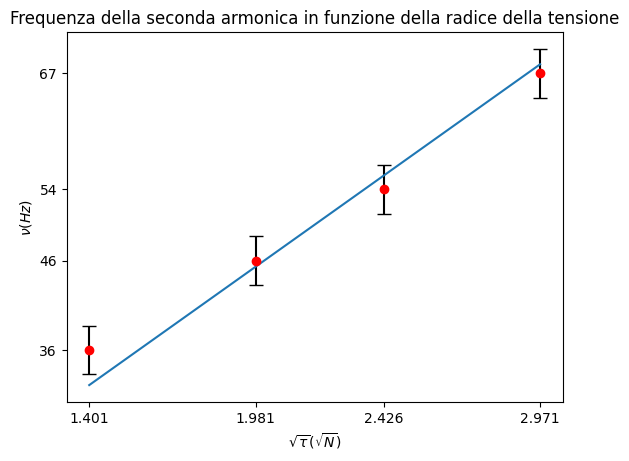


linearità BX
    
B: 22.893970714366024
sigmaB 0.5590776367934004

sigmaY: 2.7274913989962557
chiquadro ridotto: 0.1374
df: 4.0
    



In [5]:
m = np.array(fr['massa']) * 0.001 #Kg
f2 = np.array(fr['f2'])

tau = m * 9.81 #N
sq_tau = np.sqrt(tau)

r = RettaInterpolataB(sq_tau,f2,1)
plt.errorbar(sq_tau,f2,yerr = r.sigmaY, fmt='o', color='red', ecolor='black', capsize=5)
plt.plot(r.x_best,r.y_best)
plt.xticks(sq_tau)
plt.yticks(f2)
plt.xlabel('$\sqrt{' + f'{chr(92)}' + 'tau} (\sqrt{N})$')
plt.ylabel(f'${chr(92)}nu (Hz)$')
plt.title('Frequenza della seconda armonica in funzione della radice della tensione')
plt.show()

print(r)

### confronto frequenza con valore teorico:

n = 2

$\nu = \frac{n}{2L}\sqrt{\frac{\tau}{\mu}} \Rightarrow 
\nu = \frac{1}{L}\sqrt{\frac{\tau}{\mu}} \Rightarrow 
B = \frac{1}{L\sqrt{\mu}}$

In [9]:
L = 0.82 # m
m_corda = 4.3 * 0.001 # Kg
l_corda = 2.0 # m
mu = m_corda / l_corda

m = np.array(fr['massa']) * 0.001 # Kg
tau = m * 9.81 # N
sq_tau = np.sqrt(tau)
f2 = np.array(fr['f2'])

r = RettaInterpolataB(sq_tau,f2,1)

f_interpolate = np.round(r.B * sq_tau)
f_teoriche = 1/(L*np.sqrt(mu))*sq_tau

print('f_interpolazione: ',f_interpolate)
print('f_teoriche: ',np.round(f_teoriche,0))
print('distanza in sigma: ',np.round(np.abs(f_teoriche - f_interpolate)/r.sigmaY,1))


f_interpolazione:  [32. 45. 56. 68.]
f_teoriche:  [37. 52. 64. 78.]
distanza in sigma:  [1.8 2.6 2.9 3.7]
